### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [206]:
from rich import print

In [85]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [86]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [87]:
print(reviews.groupby('gender')['gender'].count())
print('\n')
print(reviews.groupby('education')['education'].count())
print('\n')
print(reviews.groupby('education')['education'].count())
print('\n')
print(reviews.groupby('education')['education'].count())


gender
Female    1120
Male       880
Name: gender, dtype: int64


education
Basic            50
PhD             460
diploma         190
graduate        900
postgraduate    400
Name: education, dtype: int64


education
Basic            50
PhD             460
diploma         190
graduate        900
postgraduate    400
Name: education, dtype: int64


education
Basic            50
PhD             460
diploma         190
graduate        900
postgraduate    400
Name: education, dtype: int64


In [88]:
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [89]:
# Any missing values?
reviews[reviews.isna().any(axis=1)].count()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [90]:
# Explore the data.
reviews.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [91]:
# Descriptive statistics.
reviews.describe().apply(lambda x: x.round(2))

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,39.49,48.08,50.00,1578.03,4320.52
std,13.57,23.12,26.09,1283.24,3148.94
min,17.00,12.30,1.00,25.00,107.00
25%,29.00,30.34,32.00,772.00,1589.25
50%,38.00,47.15,50.00,1276.00,3624.00
75%,49.00,63.96,73.00,1751.25,6654.00
max,72.00,112.34,99.00,6847.00,11086.00


## 2. Drop columns

In [92]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform', 'review', 'summary'], inplace=True, axis=1)

In [93]:
# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product'],
      dtype='object')

## 3. Rename columns

In [94]:
# Rename the column headers.
new_names = {   'gender'                    : 'gender', 
                'age'                       : 'age', 
                'remuneration (k£)'         : 'remuneration',
                'spending_score (1-100)'    : 'spending_score',
                'loyalty_points'            : 'loyalty_points', 
                'education'                 : 'education', 
                'product'                   : 'product', 
                'review'                    : 'review', 
                'summary'                   : 'summary'
            }
reviews.rename(columns=new_names, inplace=True)


In [95]:
# View column names.
reviews.dtypes

gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
dtype: object

## 4. Save the DataFrame as a CSV file

In [96]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [97]:
# Import new CSV file with Pandas.
df = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df

,gender,age,remuneration,spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291
...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977
1996,Female,43,92.66,8,539,PhD,979
1997,Male,34,92.66,91,5614,graduate,1012
1998,Male,34,98.40,16,1048,PhD,1031


## 5. Linear regression

### 5a) spending vs loyalty

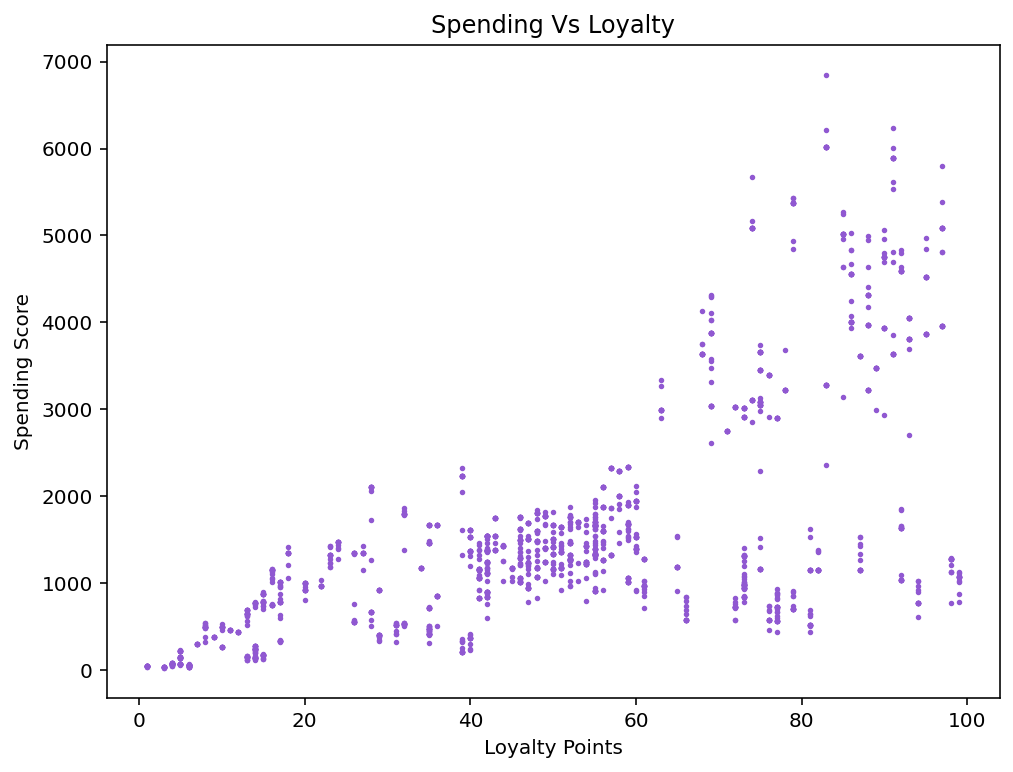

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        15:18:40   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

In [98]:
# Independent variable.
x = df['spending_score'].values.reshape(-1, 1) 

# Dependent variable.
y = df['loyalty_points'].values.reshape(-1, 1) 


# OLS model and summary.
figure(figsize=(8, 6), dpi=144)
plt.title("Spending Vs Loyalty")
plt.xlabel("Loyalty Points")
plt.ylabel("Spending Score")
plt.scatter(x, y, s=3, c='#9058d1') 
plt.show()
f = 'y ~ x'
test = ols(f, data = df).fit()
print(test.summary())


In [99]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [100]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693 * df['spending_score'] -75.052663
# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

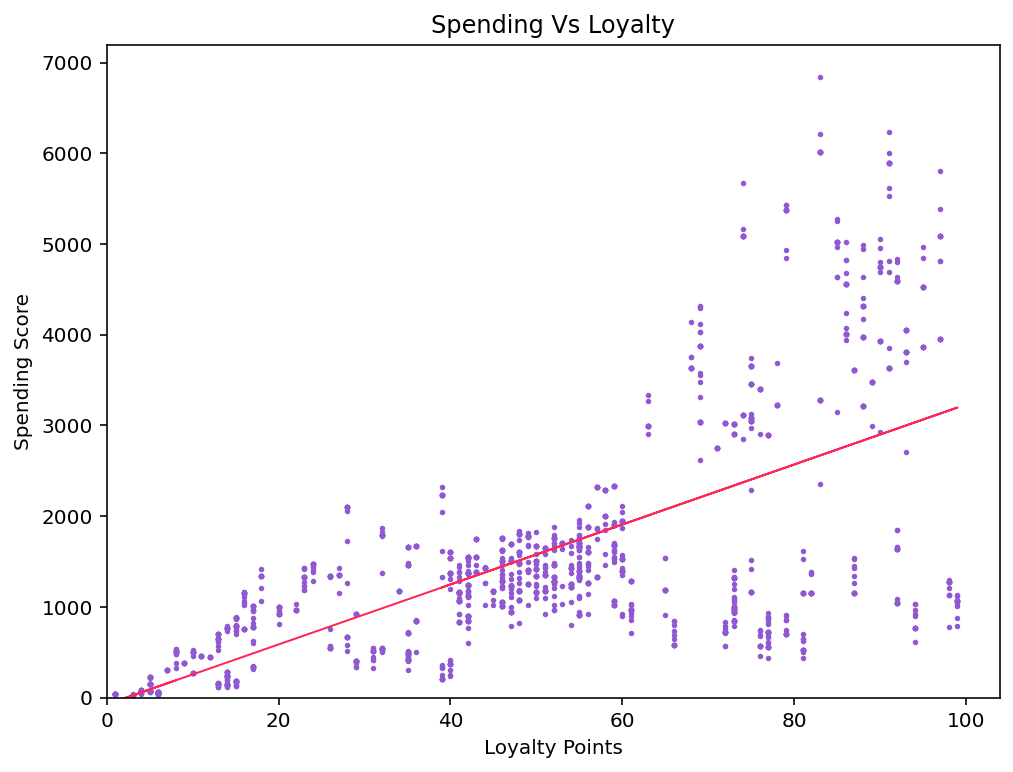

In [101]:
# Plot the graph with a regression line.
figure(figsize=(8, 6), dpi=144)
plt.title("Spending Vs Loyalty")
plt.xlabel("Loyalty Points")
plt.ylabel("Spending Score")
plt.scatter(x,y, s=3, c='#9058d1')  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='#ff265c', linewidth=1) 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) renumeration vs loyalty

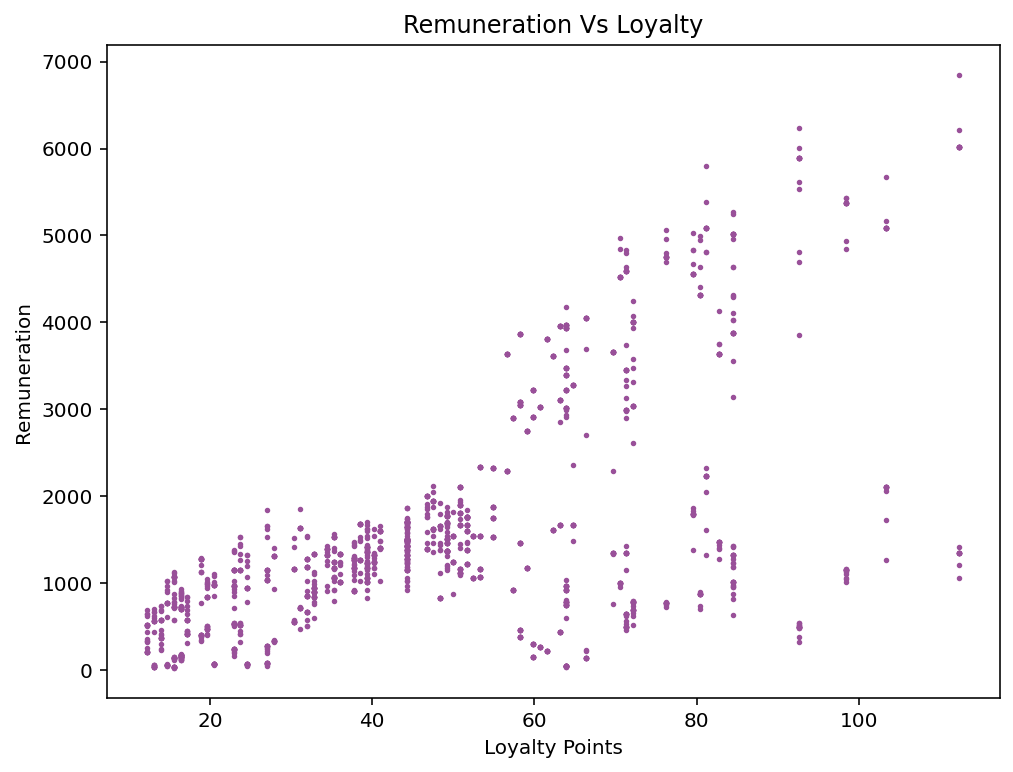

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        15:18:40   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

In [102]:
# Independent variable.
x = df['remuneration'].values.reshape(-1, 1) 

# Dependent variable.
y = df['loyalty_points'].values.reshape(-1, 1) 


# OLS model and summary.

figure(figsize=(8, 6), dpi=144)
plt.title("Remuneration Vs Loyalty")
plt.xlabel("Loyalty Points")
plt.ylabel("Remuneration")
plt.scatter(x, y, s=3, c='#995099') 
plt.show()
f = 'y ~ x'
test = ols(f, data = df).fit()
print(test.summary() )

In [103]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [104]:
# Set the X coefficient and the constant to generate the regression table.
y_pred =  34.187825 * df['remuneration'] -65.686513
# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

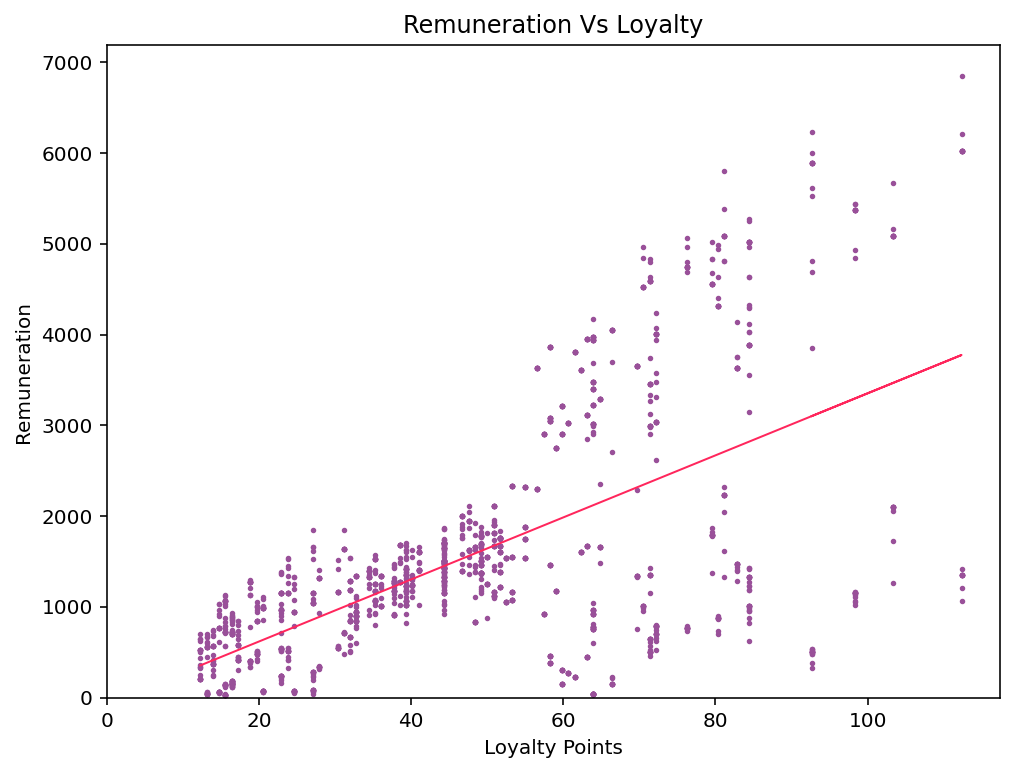

In [105]:
# Plot the graph with a regression line.
figure(figsize=(8, 6), dpi=144)
plt.scatter(x,y, s=3, c='#995099')  
plt.title("Remuneration Vs Loyalty")
plt.xlabel("Loyalty Points")
plt.ylabel("Remuneration")
# Plot the regression line (in black).
plt.plot(x,y_pred, color='#ff265c', linewidth=1) 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()


### 5c) age vs loyalty

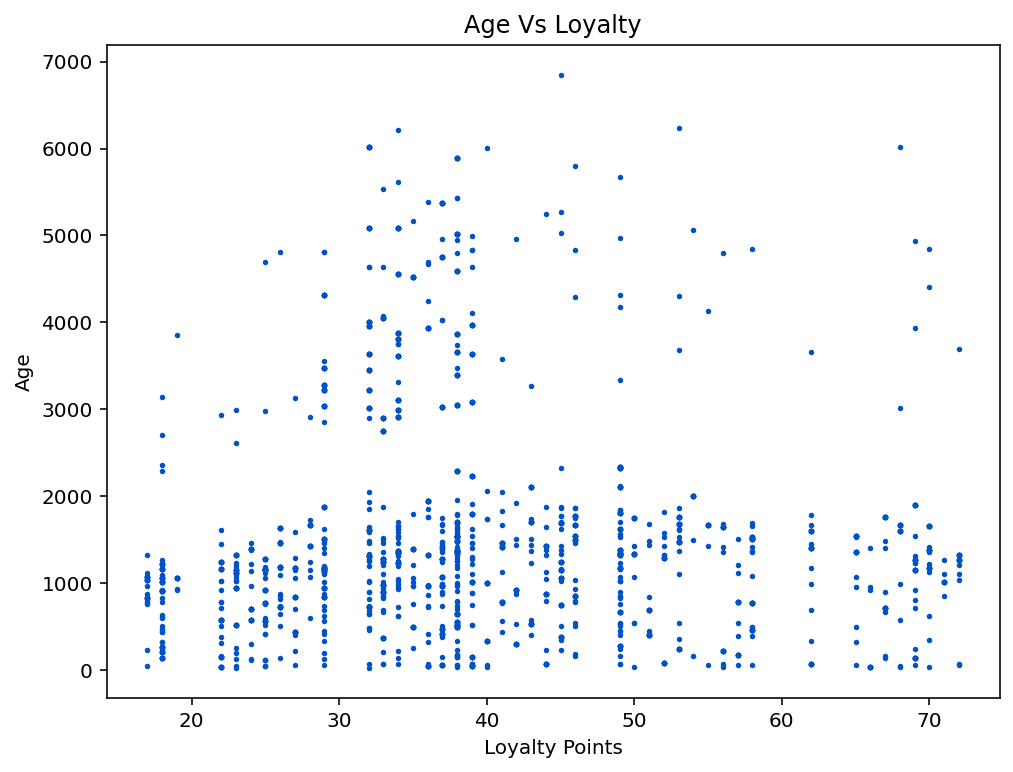

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 14 Aug 2022   Prob (F-statistic):             0.0577
Time:                        15:18:41   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

In [106]:
# Independent variable.
x = df['age'].values.reshape(-1, 1) 

# Dependent variable.
y = df['loyalty_points'].values.reshape(-1, 1) 


# OLS model and summary.
figure(figsize=(8, 6), dpi=144)
plt.title("Age Vs Loyalty")
plt.xlabel("Loyalty Points")
plt.ylabel("Age")
plt.scatter(x, y, s=3, c='#0053c7') 
plt.show()
f = 'y ~ x'
test = ols(f, data = df).fit()
print(test.summary())



In [107]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [108]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * df['age'] + 1736.517739
# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

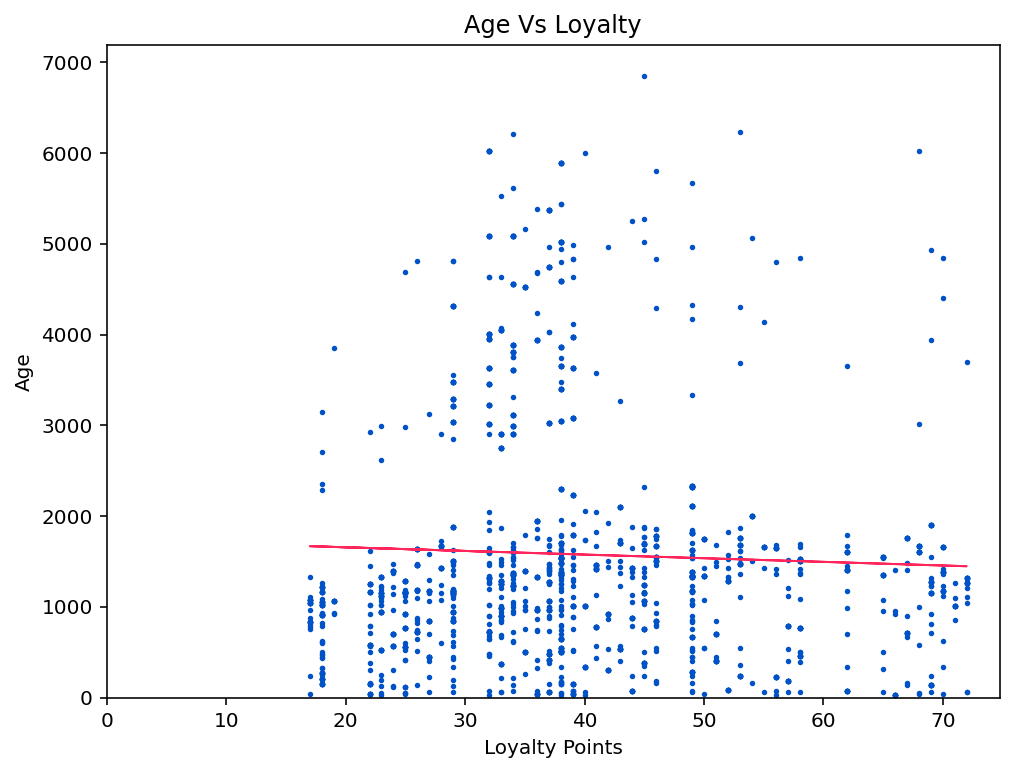

In [109]:
# Plot the graph with a regression line.
from turtle import color


figure(figsize=(8, 6), dpi=144)
plt.title("Age Vs Loyalty")
plt.xlabel("Loyalty Points")
plt.ylabel("Age")
plt.scatter(x,y, s=3, c='#0053c7')  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='#ff265c', linewidth=1) 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()


## 6. Observations and insights

For our analysis we have plotted linear regression lines for the following variables:

#### Spending Score vs Loyalty Points
In our regression model we have an R-squared 45.2% showing some corelation between the variables. Our T test has a value of 40.595 with a probability of T equal to 0 < 0.5 which would indicate that there is a corelation between these two variables.  In addition our F statistic is 1648 with a very low probability score. We can conclude that there is `weak correlation` between Spending and Loyalty Points

#### Remuneration vs Loyalty
In our regression model we have an R-squared 38.0% showing some corelation between the variables. Our T test has a value of 0.978 with a probability of T equal to 0 < 0.5 which would indicate that there is very weak corelation between these two variables.  In addition our F statistic is 1222 with a very low probability score. We can conclude that there is `very weak correlation` between Spending and Loyalty Points

#### Age vs Loyalty
In our regression model we have an R-squared 0.2% showing no corelation between the variables. Our T test has a value of -1.899 with a probability of T equal to 0 .058< 0.5 which would indicate that there is no corelation between these two variables.  In addition our F statistic is very low at 3.606 with a very low probability score close to zero. We can conclude that there is `no correlation` between Spending and Loyalty Points




# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [110]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

from matplotlib.pyplot import figure


import warnings
warnings.filterwarnings('ignore')

In [111]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [112]:
# Explore the data.
print(f"""
SHAPE:
{df2.shape}

COLUMNS:
{df2.columns}
        """)

print(df2.info())



SHAPE:
(2000, 2)

COLUMNS:
Index(['remuneration', 'spending_score'], dtype='object')
        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [113]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

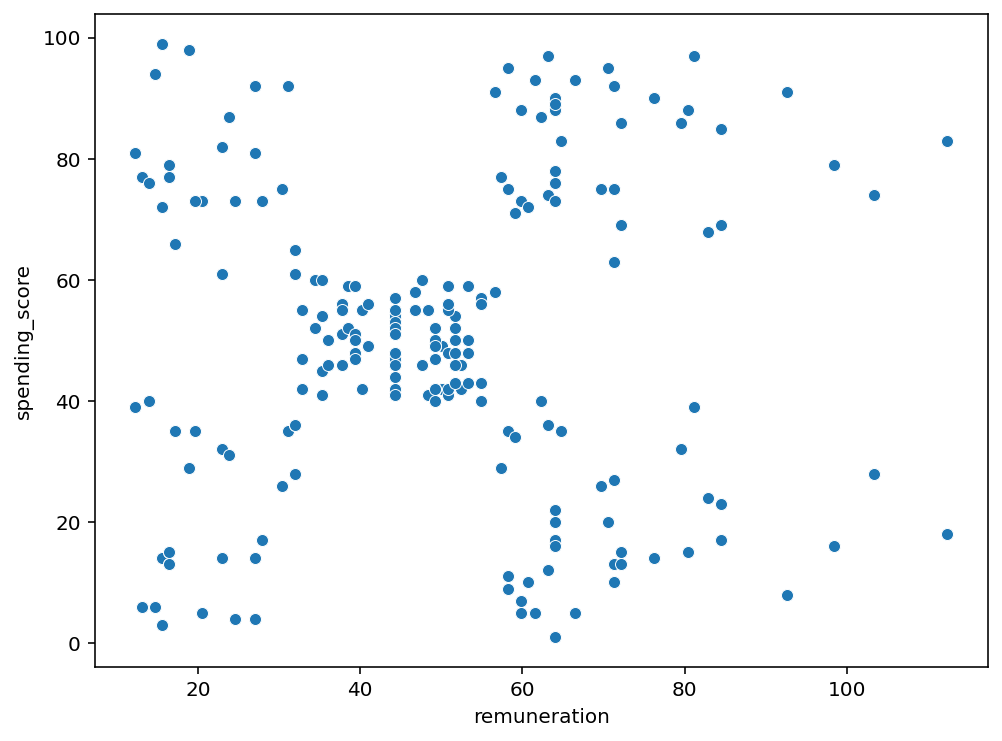

In [114]:
# Create a scatterplot with Seaborn.
figure(figsize=(8, 6), dpi=144)
sns.scatterplot(df2['remuneration'], df2['spending_score'])

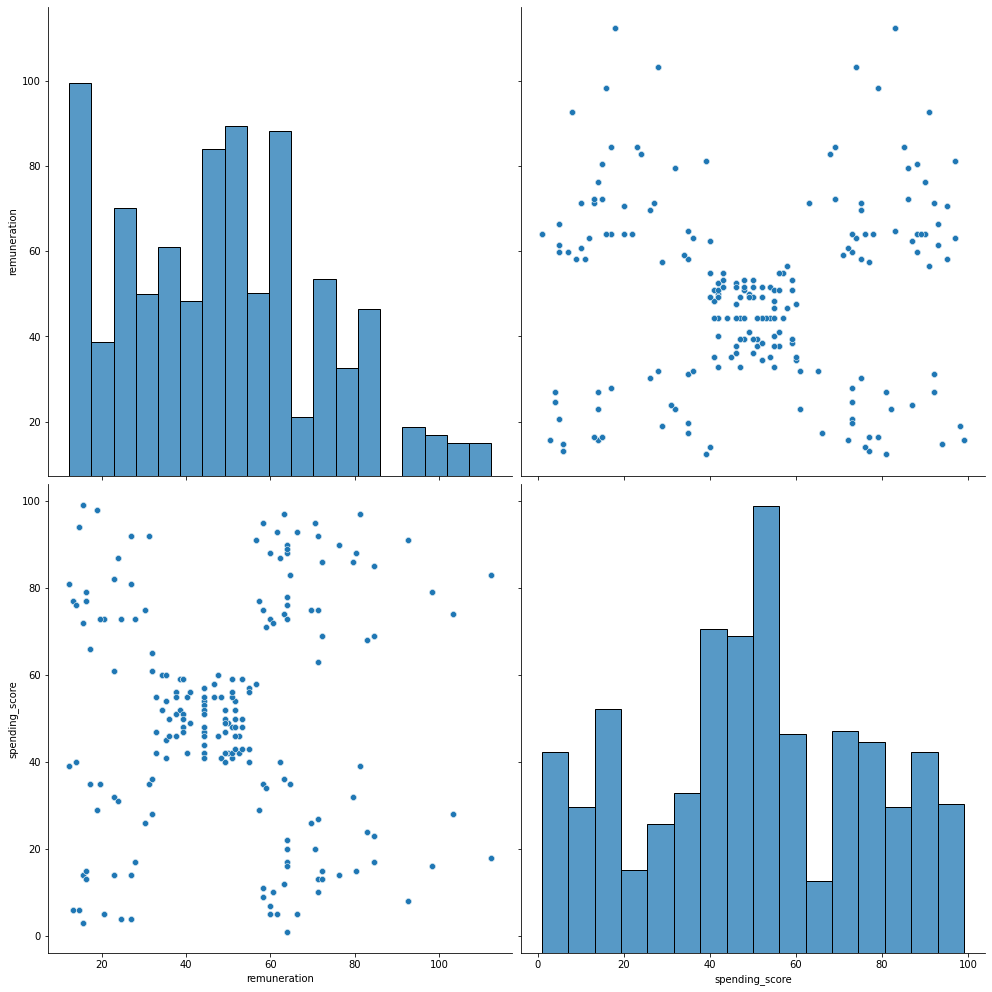

In [115]:
# Create a pairplot with Seaborn.
sns.pairplot(df2, height=7)

## 3. Elbow and silhoutte methods

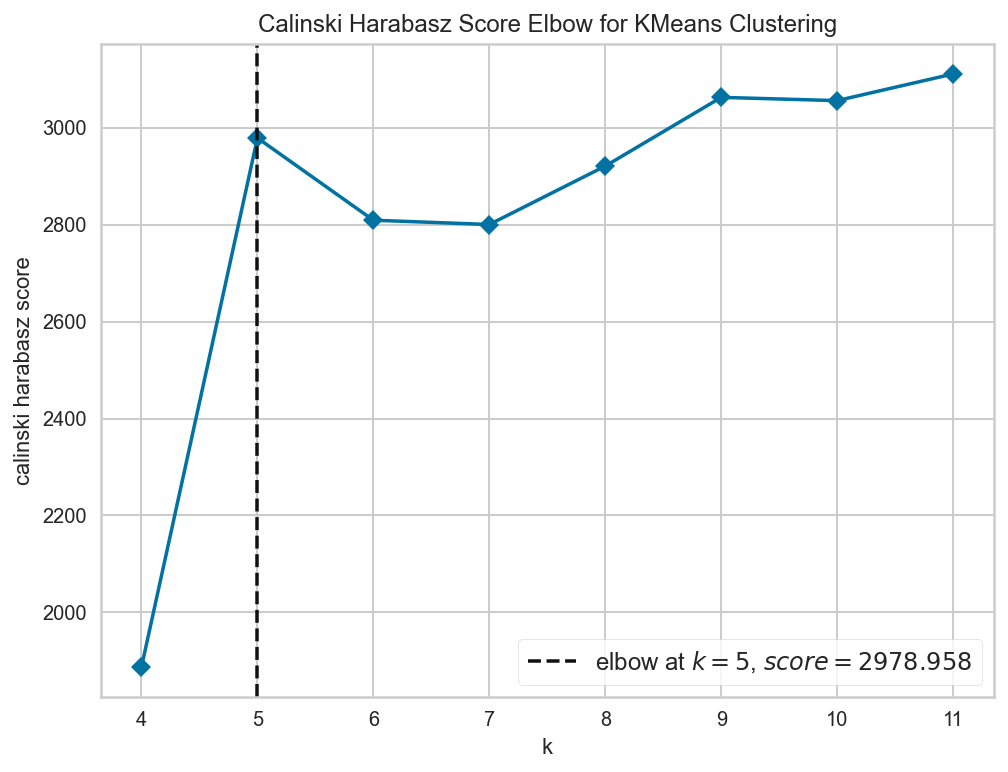

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [116]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
figure(figsize=(8, 6), dpi=144)
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

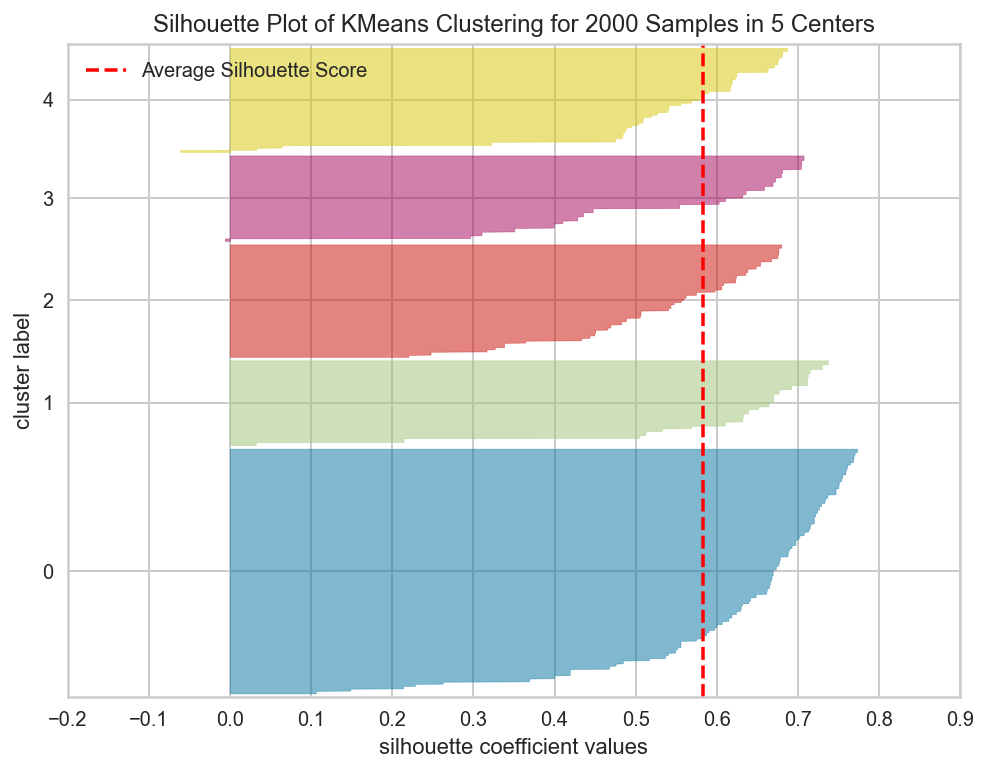

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [117]:
# Determine the number of clusters: Silhouette method.
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Specify the features to use for clustering
features = ['remuneration', 'spending_score']
X = df2[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
figure(figsize=(8, 6), dpi=144)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


## 4. Evaluate k-means model at different values of *k*

In [118]:
# Import libraries.
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')




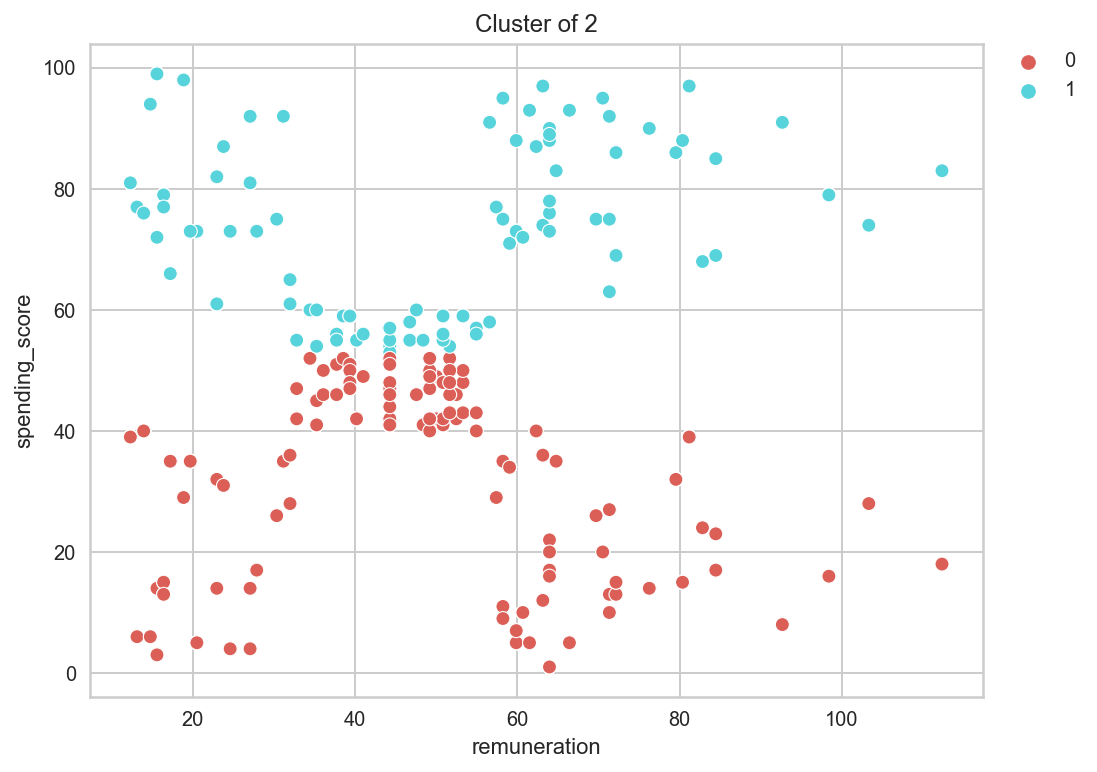

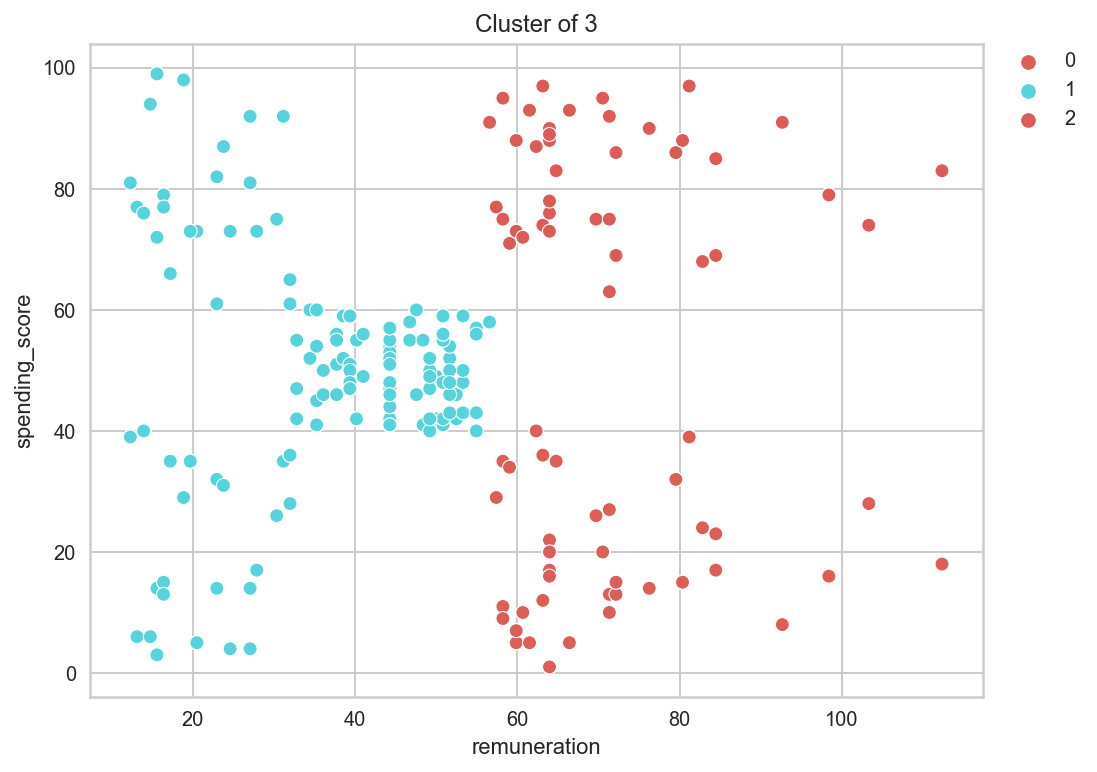

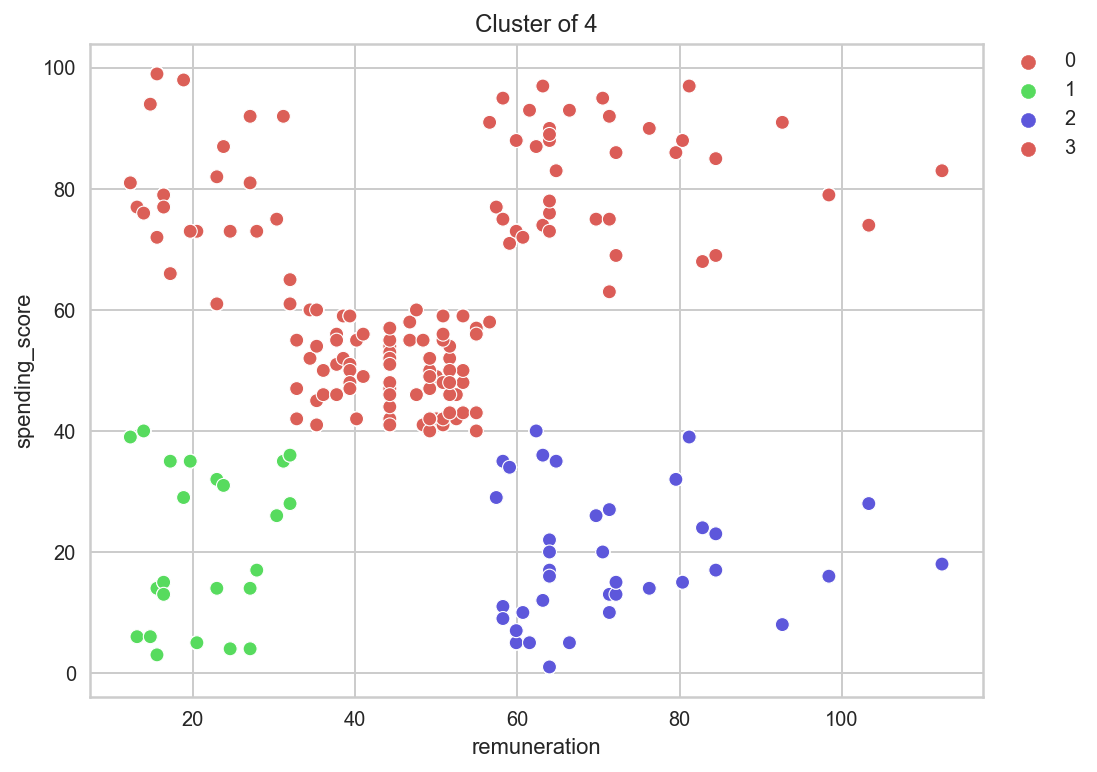

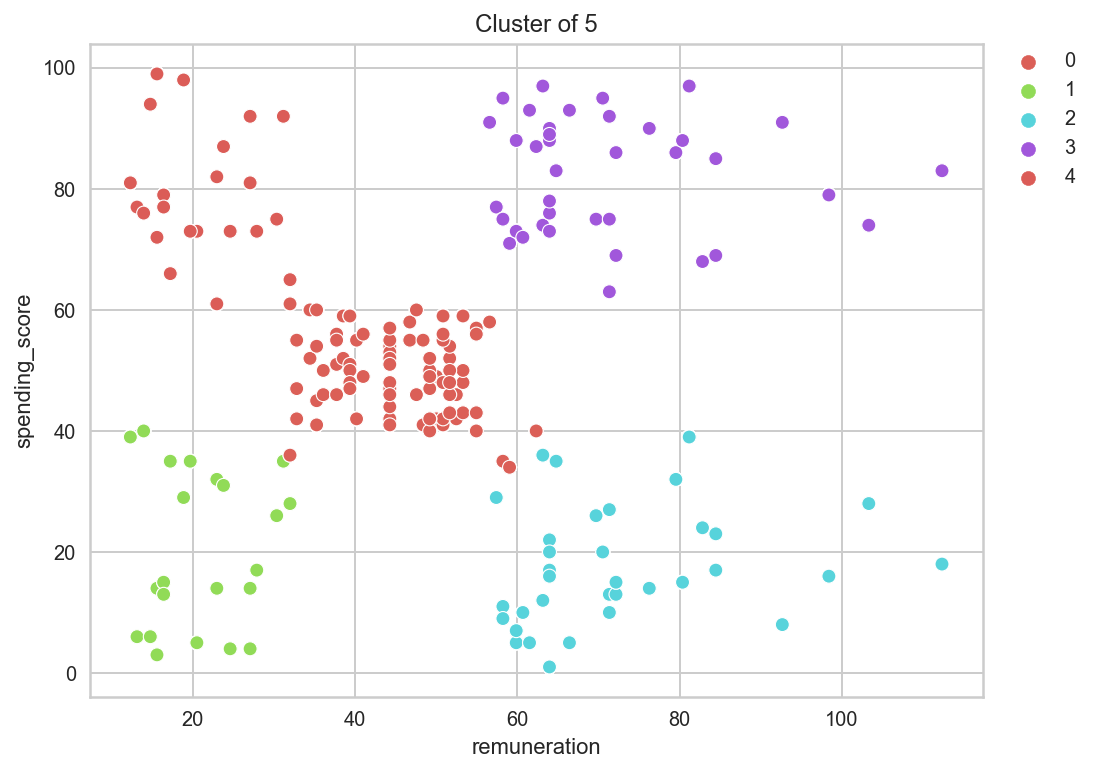

In [119]:
# Create a scatterplot with Seaborn.
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(df2)
    figure(figsize=(8, 6), dpi=144)
    plt.title(f"Cluster of {i}")
    ax = sns.scatterplot(x='remuneration', y='spending_score', hue=kmeans.labels_, data=df2, palette='hls')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## 5. Fit final model and justify your choice

In [120]:
# Apply the final model.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

In [121]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [122]:
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


## 6. Plot and interpret the clusters

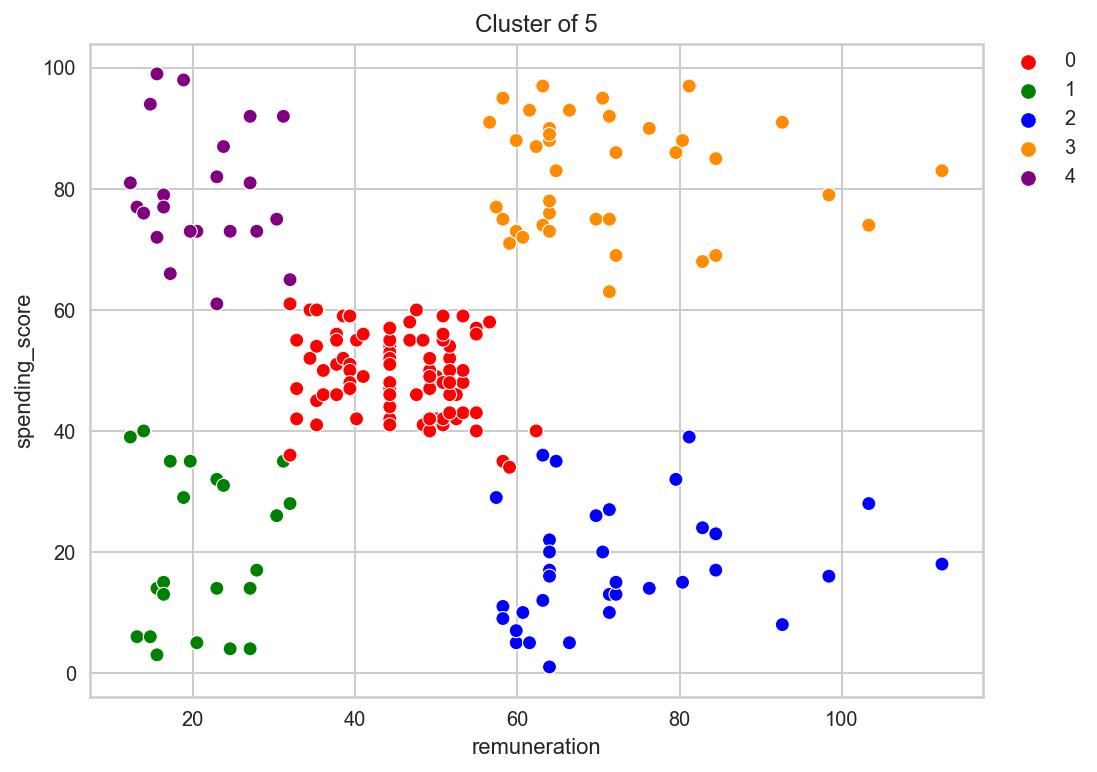

In [123]:
# Visualising the clusters.
figure(figsize=(8, 6), dpi=144)
plt.title(f"Cluster of 5")
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'darkorange', 'purple'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



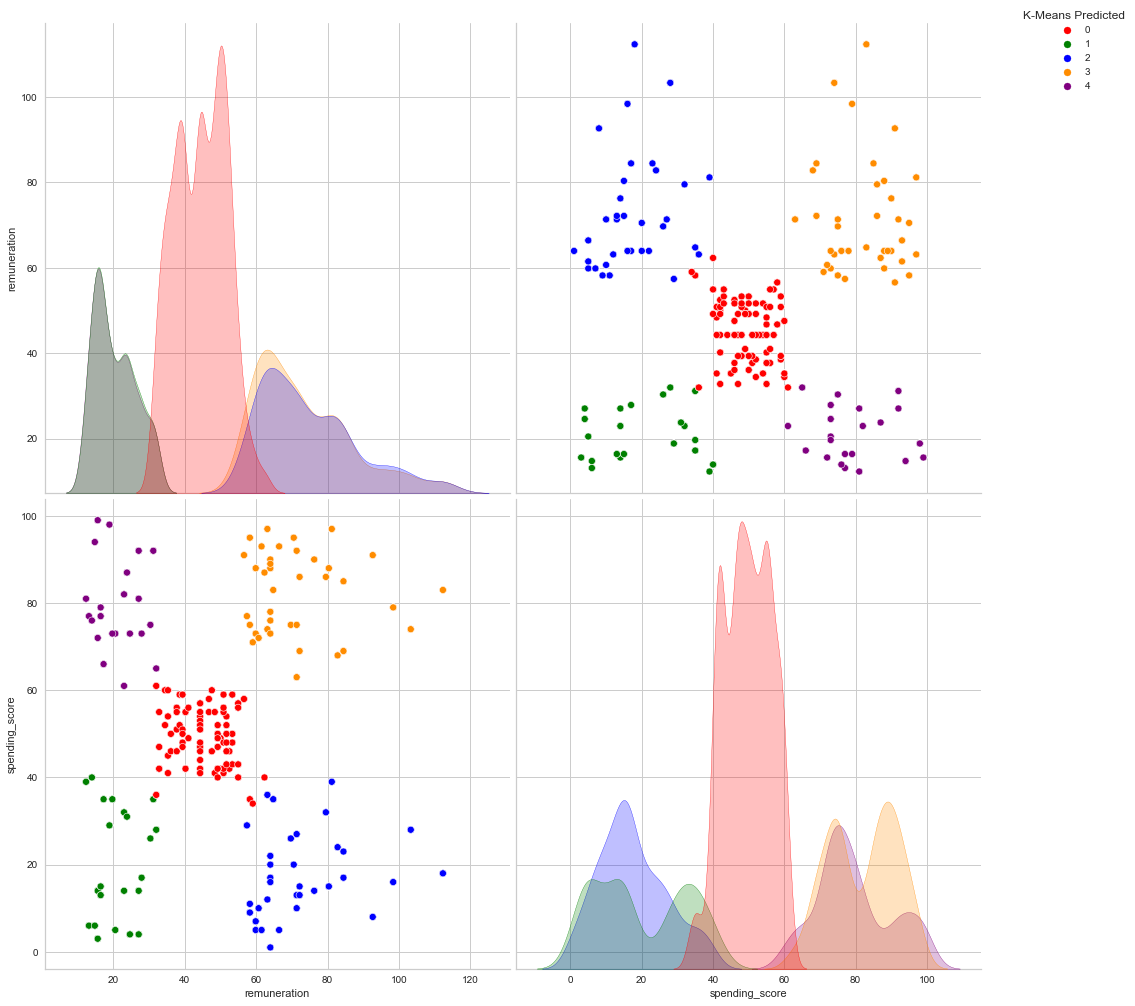

In [124]:
# Visualising the clusters.
ax = sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde', palette=['red', 'green', 'blue', 'darkorange', 'purple'], height=7)
sns.move_legend(ax, bbox_to_anchor=(.92, 1), loc='upper left', borderaxespad=0)



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [175]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

import re

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')
df3 = df3[['review', 'summary']]
# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [177]:
# Explore data set.
print(df3.shape)
print(df3.dtypes)

(2000, 2)
review     object
summary    object
dtype: object


In [128]:
# Keep necessary columns. Drop unnecessary columns.

# already done

# View DataFrame.


In [178]:
# Determine if there are any missing values.
test = df3.notnull()

test[ (test['review'] == False) | (test['summary'] == False) ]

,review,summary


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [179]:
# Review: Change all to lower case and join with a space.
for column in ['review', 'summary']:
    df3[column] = df3[column].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [180]:
# Summary: Change all to lower case and join with a space.
# already done

df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [181]:
# Replace all the punctuations in review column.
for column in ['review', 'summary']:
    df3[column] = df3[column].apply(lambda text: re.sub(r"[^\w\s]", '', text))
    df3[column] = df3[column].apply(lambda text: re.sub(r"[\n]", ' ', text))
    # View output.
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [182]:
# Replace all the puncuations in summary column.

# Already done

# View output.
df3.shape


(2000, 2)

### 2c) Drop duplicates in both columns

In [183]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()
df3.reset_index(inplace = True)
# View DataFrame.
df3.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [249]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()
df4.drop(['index'], axis=1, inplace=True)
df4.reset_index(inplace = True, drop = True)
# View DataFrame.
df4['all reviews']= df4['review'] + ' ' + df4['summary']
df4.head()

,review,summary,all reviews
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,amazing buy bought it as a gift for our new dm...,five stars,amazing buy bought it as a gift for our new dm...
4,as my review of gf9s previous screens these we...,money trap,as my review of gf9s previous screens these we...


In [250]:
stop_words = set(stopwords.words('english'))

# Apply tokenisation to both columns.


for column in ['review', 'summary']:
    df4[f"tokenized {column}"] = df4[column].apply(lambda text: [word_tokenize(text)])

In [244]:
# Review: Create a word cloud.
all_reviews = ''
for i in range(df4.shape[0]):
    all_reviews += df4['all reviews'][i]

In [245]:
print(f"Extract 100 words: \n{all_reviews.split()[:100]}")
print(f"\n Total number of words: {len(all_reviews.split())}")

Extract 100 words: 
['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on', 'the', 'screen', 'itself', 'is', 'at', 
'an', 'absolute', 'premium', 'the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on', 'art', 
'and', 'not', 'terribly', 'informative', 'or', 'needed', 'art', 'as', 'well', 'makes', 'it', 'completely', 
'useless', 'the', 'only', 'reason', 'that', 'i', 'gave', 'it', '2', 'stars', 'and', 'not', '1', 'was', 'that', 
'technically', 'speaking', 'it', 'can', 'at', 'least', 'still', 'stand', 'up', 'to', 'block', 'your', 'notes', 
'and', 'dice', 'rolls', 'other', 'than', 'that', 'it', 'drops', 'the', 'ball', 'completely', 'the', 'fact', 'that',
'50', 'of', 'this', 'space', 'is', 'wasted', 'on', 'art', 'and', 'not', 'terribly', 'informative', 'or', 'needed', 
'art', 'an', 'open']

Total number of words: 119545

In [198]:

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

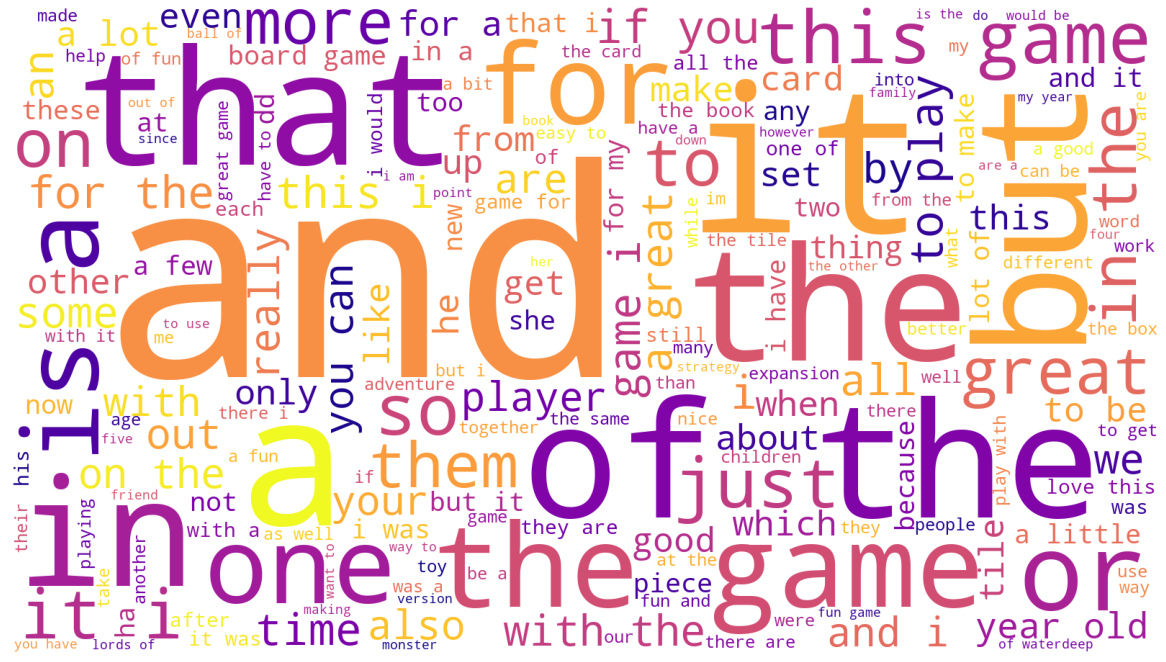

In [196]:
# Review: Plot the WordCloud image.         
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

### Different Method

In [199]:
# Determine the frequency distribution.
from collections import Counter
# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = all_reviews.split(' ')
# and count the words
word_counts = Counter(word_list)

In [212]:
output = ''
for w in word_counts.most_common(20):
    output+= f"{w[0]}:  \t{w[1]}\n"
    
print(output)

the:    5623
and:    3400
a:      3356
to:     3352
of:     2626
it:     2160
i:      1938
is:     1883
game:   1830
for:    1770
this:   1680
with:   1334
you:    1220
in:     1183
that:   1095
are:    977
my:     903
but:    877
have:   771
as:     767

### Original Method

In [201]:
# Tokenise the words.
df4['tokens'] = df4['all reviews'].apply(word_tokenize)

# Preview data.
df4['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [203]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4['tokens'][i]

In [208]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
print(fdist)

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this':
1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [213]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in all_tokens if word.isalnum()]

In [214]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [223]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(tokens2_string) 

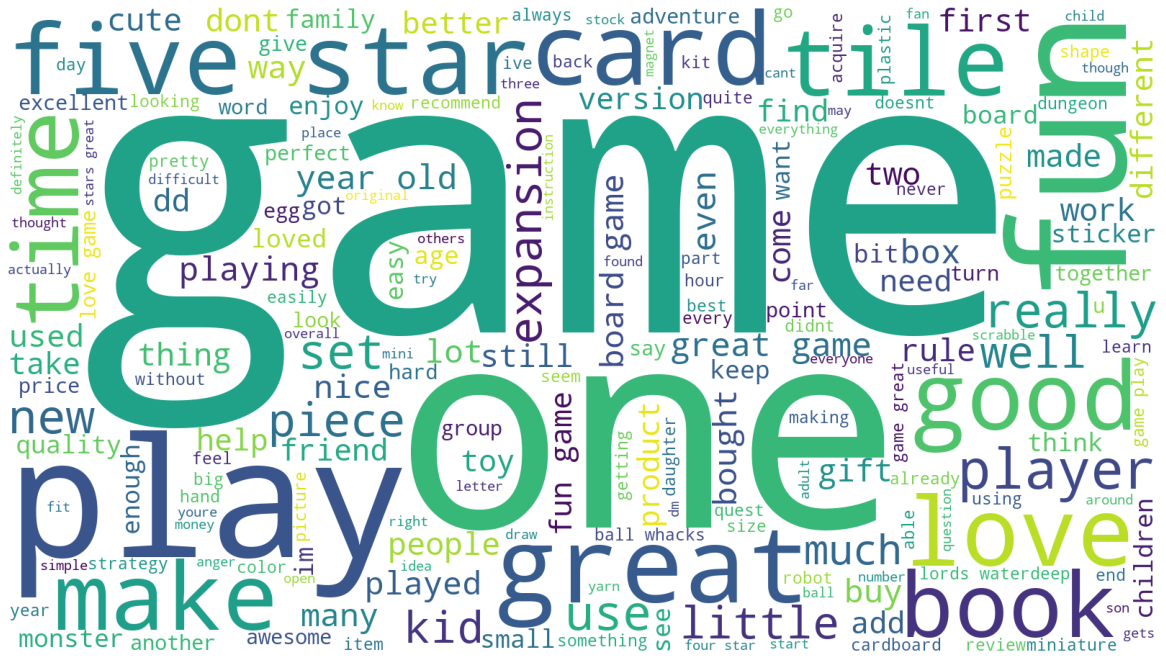

In [224]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



### 4d) Identify 15 most common words and polarity

In [228]:
word_list = tokens2_string.split(' ')
# and count the words
word_counts = Counter(word_list)

In [233]:
# Determine the 15 most common words.
output = ''
for w in word_counts.most_common(15):
    output+= f"{w[0].title()}\t :  {w[1]}\n"
    
print(output)

Game     :  1990
Great    :  875
Fun      :  770
One      :  568
Play     :  528
Like     :  468
Stars    :  464
Love     :  416
Good     :  381
Five     :  362
Really   :  349
Get      :  333
Tiles    :  317
Book     :  316
Time     :  309

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [234]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [251]:
# Determine polarity of both columns. 
df4['polarity cumulative'] = df4['all reviews'].apply(generate_polarity)
df4['polarity review'] = df4['review'].apply(generate_polarity)
df4['polarity summary'] = df4['summary'].apply(generate_polarity)
# View output.
df4.describe()

,polarity cumulative,polarity review,polarity summary
count,1961.000000,1961.000000,1961.000000
mean,0.232101,0.213170,0.223678
std,0.258249,0.260360,0.337507
min,-0.780000,-1.000000,-1.000000
25%,0.066667,0.045833,0.000000
50%,0.200000,0.177222,0.100000
75%,0.382870,0.351562,0.475000
max,1.000000,1.000000,1.000000


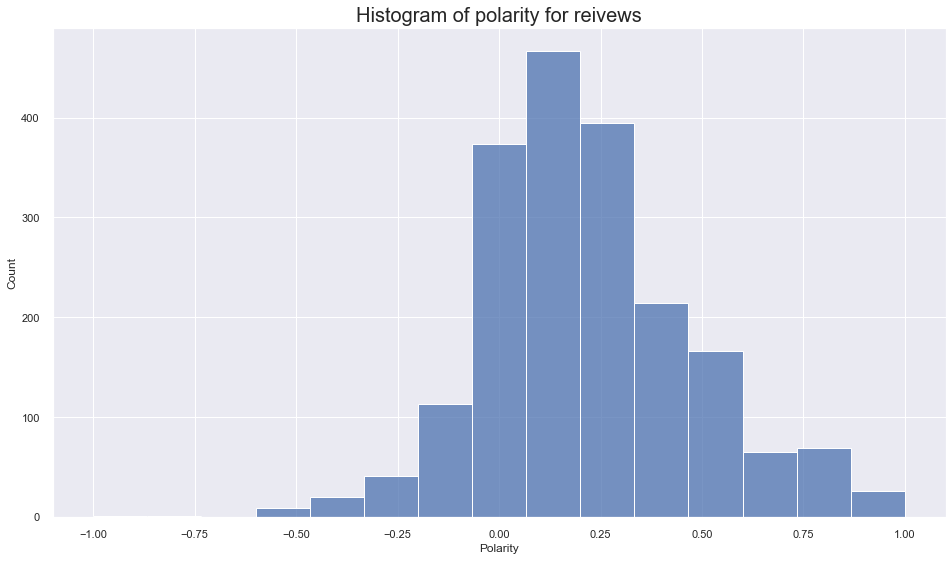

In [257]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(16,9))
sns.histplot(df4['polarity review'], bins = 15)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity for reivews', fontsize=20)

plt.show();

# Histogram of sentiment score


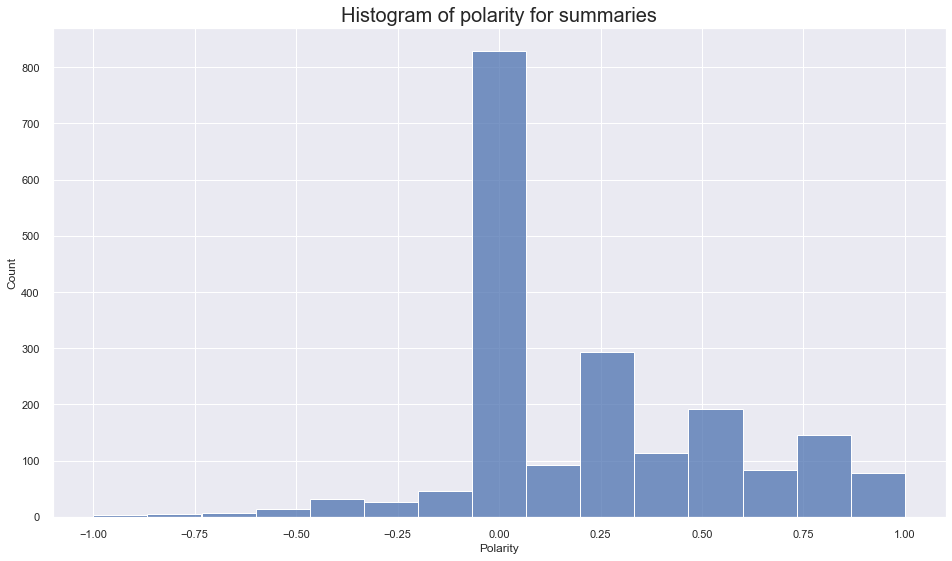

In [258]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(16,9))
sns.histplot(df4['polarity summary'], bins = 15)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity for summaries', fontsize=20)

plt.show();
# Histogram of sentiment score


In [262]:
# Calculate sentiment
metrics = df4.describe()

print(f"The sentiment score is {metrics['polarity cumulative']['mean']}")

The sentiment score is 0.23210059571046762

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [266]:
# Top 20 negative reviews.

# View output.
df4[['review','polarity review']].sort_values(by='polarity review', ascending=True).head(20)


,review,polarity review
207,booo unles you are patient know how to measure...,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring...,-0.583333
362,one of my staff will be using this game soon s...,-0.550000
1501,expensive for what you get,-0.500000
116,i bought this as a christmas gift for my grand...,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
226,this was a gift for my daughter i found it dif...,-0.500000


In [268]:
# Top 20 negative summaries.

# View output.
df4[['summary','polarity summary']].sort_values(by='polarity summary', ascending=True).head(20)


,summary,polarity summary
207,boring unless you are a craft person which i am,-1.000000
21,the worst value ive ever seen,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
785,disappointed,-0.750000
1591,disappointed,-0.750000
143,disappointed,-0.750000
623,disappointed,-0.750000
361,promotes anger instead of teaching calming met...,-0.700000


In [269]:
# Top 20 positive reviews.


# View output.
df4[['review','polarity review']].sort_values(by='polarity review', ascending=False).head(20)


,review,polarity review
782,perfect,1.0
1695,excellent toy to simulate thought,1.0
193,awesome gift,1.0
1929,perfect for tutoring my grandson in spelling,1.0
1159,awesome addition to my rpg gm system,1.0
1150,best set buy 2 if you have the means,1.0
517,perfect just what i ordered,1.0
1684,awesome toy,1.0
1689,it is the best thing to play with and also min...,1.0
613,wonderful for my grandson to learn the resurre...,1.0


In [270]:
# Top 20 positive summaries.


# View output.
df4[['summary','polarity summary']].sort_values(by='polarity summary', ascending=False).head(20)


,summary,polarity summary
1014,one of the best,1.0
1899,excellent,1.0
805,one of the best games ever,1.0
1601,awesome learning tool,1.0
162,he was very happy with his gift,1.0
1152,best orcs from wotc,1.0
1367,awesome expansion,1.0
1062,perfect gift,1.0
139,awesome sticker activity for the price,1.0
1153,awesome,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

# 